In [1]:
from clf_funcs import setup, get_cifar10_data, get_mnist_loaders, classifier_overlay, combine_model, FullyConnectedNet, SimpleConvNetBuilder, PerfCounterCallback
from dcgan_funcs import train_dcgan, GeneratorBuilder, DiscriminatorBulider, get_celeba_loader, train_step

import matplotlib.pyplot as plt

import tensorflow as tf

setup()

2023-12-11 11:13:46.958959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 11:14:00.883979: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 11:14:02.320438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-

In [2]:
batch_size = 69
test_batch_size = 128
epochs = 2
lr = 1e-2
momentum = 0.9
num_classes = 10
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
setup()

In [3]:
model = combine_model(tf.keras.layers.Input(shape=(32,32,3)), tf.keras.applications.MobileNetV2, classifier_overlay)
train_ds, test_ds = get_cifar10_data(tf.keras.applications.mobilenet_v2.preprocess_input)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

2023-11-20 15:04:20.751073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 15:04:20.751368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 15:04:20.751511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
train_history = model.fit(
	train_ds[0], train_ds[1],
	batch_size=batch_size,
	validation_data=test_ds,
	validation_batch_size=test_batch_size,
	epochs=epochs,
	shuffle=True,
)

2023-11-20 15:04:32.232894: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-11-20 15:04:32.678912: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2


2023-11-20 15:04:38.430859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-20 15:04:40.698925: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f84f02fa690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-20 15:04:40.698950: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-11-20 15:04:40.749472: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-20 15:04:42.654239: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-20 15:04:42.950969: W tensorflow/tsl/framework/bf

724/725 [============================>.] - ETA: 0s - loss: 1.7456 - accuracy: 0.3532

2023-11-20 15:05:42.991472: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-20 15:05:43.029625: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 916.21MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-20 15:05:43.056997: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 723.11MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-20 15:05:43.091564: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator 

725/725 [==============================] - ETA: 0s - loss: 1.7453 - accuracy: 0.3533

2023-11-20 15:05:45.646649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 414.19MiB (434307072 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


725/725 [==============================] - 75s 84ms/step - loss: 1.7453 - accuracy: 0.3533 - val_loss: 2.3089 - val_accuracy: 0.1000
Epoch 2/2
725/725 [==============================] - 57s 78ms/step - loss: 1.4098 - accuracy: 0.4893 - val_loss: 2.3318 - val_accuracy: 0.1000


In [7]:
train_history.history

{'loss': [1.745261549949646, 1.4098153114318848],
 'accuracy': [0.3533399999141693, 0.489300012588501],
 'val_loss': [2.30887508392334, 2.3317720890045166],
 'val_accuracy': [0.10000000149011612, 0.10000000149011612]}

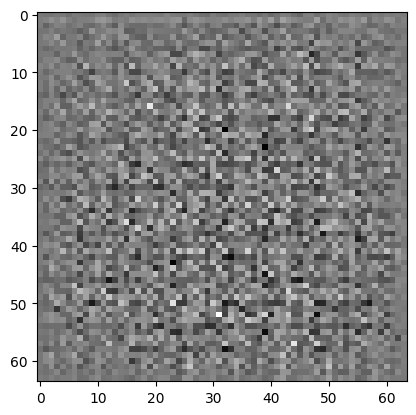

In [23]:
generator = GeneratorBuilder(100, 64)

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [27]:
discriminator = DiscriminatorBulider()

discriminator(generated_image)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.9833589]], dtype=float32)>

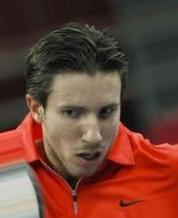

Found 202599 files belonging to 1 classes.


2023-11-27 21:00:48.919038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 21:00:48.919394: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 21:00:48.919689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import pathlib
import PIL
import PIL.Image
import tensorflow as tf
from IPython.display import display

celeba_imgs_paths = list(pathlib \
	.Path('../datasets/celeba/img_align_celeba/') \
	.glob('*.jpg')
)
len(celeba_imgs_paths)

display(PIL.Image.open(celeba_imgs_paths[0]))

train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path('../datasets/celeba'),
  label_mode=None,
  seed=123,
  image_size=(64, 64),
  batch_size=128)

def get_celeba_loader(batch_size, image_size=64):
    return tf.keras.utils.image_dataset_from_directory(
        pathlib.Path('../datasets/celeba'),
        label_mode=None,
        seed=123,
        image_size=(image_size, image_size),
        batch_size=batch_size
    )

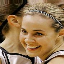

In [7]:
for b in train_ds:
	display(tf.keras.utils.array_to_img(b[0]))
	break

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [1]:
import tensorflow as tf
from tf_funcs import GeneratorBuilder, DiscriminatorBulider, get_celeba_loader
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt

def setup():
	gpus = tf.config.experimental.list_physical_devices('GPU')
	if gpus:
		try:
			for gpu in gpus:
				tf.config.experimental.set_memory_growth(gpu, True)
		except RuntimeError as e:
			print(e)

setup()

2023-11-27 21:13:13.711718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 21:13:15.509423: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 21:13:15.513608: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-

In [13]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(modelG, modelD, optG, optD, imgs_batch, loss_func, latent_vec_size=100):
	noise = tf.random.normal([imgs_batch.shape[0], latent_vec_size])

	with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
		generated_images = modelG(noise, training=True)

		real_output = modelD(imgs_batch, training=True)
		fake_output = modelD(generated_images, training=True)
		D_x = tf.reduce_mean(real_output)
		D_G_z1 = tf.reduce_mean(fake_output)

		# generator loss
		gen_loss = loss_func(tf.ones_like(fake_output), fake_output)

		# discrimanator loss
		real_loss = loss_func(tf.ones_like(real_output), real_output)
		fake_loss = loss_func(tf.zeros_like(fake_output), fake_output)
		disc_loss = real_loss + fake_loss

	gradients_of_generator = gen_tape.gradient(gen_loss, modelG.trainable_variables)
	gradients_of_discriminator = disc_tape.gradient(disc_loss, modelD.trainable_variables)

	optG.apply_gradients(zip(gradients_of_generator, modelG.trainable_variables))
	optD.apply_gradients(zip(gradients_of_discriminator, modelD.trainable_variables))

	fake_output_graded = modelD(generated_images)
	D_G_z2 = tf.reduce_mean(fake_output_graded)

	return gen_loss, disc_loss, D_x, D_G_z1, D_G_z2


In [14]:
import numpy as np
import time

def train_dcgan(config, telemetry, child_conn):
	print('Benchmarks for DCGAN begin')
	setup()

	celeba_ds = get_celeba_loader(config['batch_size'])
	modelG = GeneratorBuilder()
	modelD = DiscriminatorBulider()
	optG = tf.keras.optimizers.Adam(config['lr'])
	optD = tf.keras.optimizers.Adam(config['lr'])
	# both need to be of tf.Variable type for tf.Funciton train_step
	loss_func = config['loss_func_GAN']
	latent_vec_size = config['latent_vec_size']

	running_loss_G, running_loss_D = 0.0, 0.0
	running_D_x, running_D_G_z1, running_D_G_z2 = 0.0, 0.0, 0.0

	for epoch in range(config['epochs']):
		history = {
			'loss_G': [],
			'loss_D': [],
			'D_x': [],
			'D_G_z1': [],
			'D_G_z2': []
		}
		start = time.perf_counter_ns()
		for batch_idx, data in enumerate(celeba_ds):
			errG, errD, D_x, D_G_z1, D_G_z2 = train_step(modelG, modelD, optG, optD, data, loss_func)

			# batch telemetry
			running_loss_G += errG
			running_loss_D += errD
			running_D_x += D_x
			running_D_G_z1 += D_G_z1
			running_D_G_z2 += D_G_z2
			if batch_idx % config['log_interval'] == config['log_interval'] - 1:
				history['loss_G'].append(running_loss_G / config['log_interval'])
				history['loss_D'].append(running_loss_D / config['log_interval'])
				history['D_x'].append(running_D_x / config['log_interval'])
				history['D_G_z1'].append(running_D_G_z1 / config['log_interval'])
				history['D_G_z2'].append(running_D_G_z2 / config['log_interval'])

				if not config['silent']:
					print('[%d][%d/%d]\tLoss_G: %.4f\tLoss_D: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
					  % (epoch, batch_idx, len(celeba_ds),
						 errG, errD, D_x, D_G_z1, D_G_z2))
					
		end = time.perf_counter_ns()
					
		# epoch telemetry
		for stat in history:
			history[stat] = np.sum(history[stat]) / len(history[stat])

		telemetry['model_name'].append('DCGAN')
		telemetry['type'].append('training')
		telemetry['epoch'].append(epoch)
		telemetry['loss'].append(f'{history["loss_G"]}|{history["loss_D"]}')
		telemetry['performance'].append(f'{history["D_x"]}|{history["D_G_z1"]}|{history["D_G_z2"]}')
		telemetry['elapsed_time'].append(end - start)

		# generation
		noise = tf.random.normal([config['test_batch_size'], config['latent_vec_size']])
		start = time.perf_counter_ns()
		_ = modelG(noise)
		end = time.perf_counter_ns()

		# generation telemetry
		telemetry['model_name'].append('DCGAN')
		telemetry['type'].append('generation')
		telemetry['epoch'].append(1)
		telemetry['loss'].append(-1)
		telemetry['performance'].append(-1)
		telemetry['elapsed_time'].append(end - start)

		# child_conn.send(telemetry)
		pd.DataFrame(telemetry).to_csv(f'../results/tensorflow_results.csv', index=False)

		del modelG, modelD, celeba_ds


In [15]:
config = {
	'batch_size': 96,
	'test_batch_size': 128,
	'epochs': 2,
	'lr': 1e-4,
	'loss_func_GAN': tf.keras.losses.BinaryCrossentropy(from_logits=True),
	'log_interval': 200,
	'silent': False,
	'latent_vec_size': 100
}

telemetry = {
	'model_name': [],
	'type': [],
	'epoch': [],
	'loss': [],
	'performance': [],
	'elapsed_time': []
}

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

generator = GeneratorBuilder()
discriminator = DiscriminatorBulider()

In [3]:
generator = GeneratorBuilder()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              819200    
                                                                 
 re_lu (ReLU)                (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 256)         2097152   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 8, 8, 256)         1024      
 Normalization)                                                  
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 256)         0

2023-12-03 21:19:16.353250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 21:19:16.353562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 21:19:16.353712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
discriminator = DiscriminatorBulider()
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        3072      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       131072    
                                                                 
 batch_normalization_10 (Ba  (None, 16, 16, 128)       512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         524288    
                                                      

In [5]:
config = {
	'batch_size': 96,
	'test_batch_size': 128,
	'epochs': 1,
	'lr': 1e-4,
	'momentum': 0.0,
	'inputs': tf.keras.layers.Input(shape=(32,32,3)),
	'loss_func': tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
	'loss_func_GAN': tf.keras.losses.BinaryCrossentropy(from_logits=True),
	'log_interval': 200,
	'silent': False,
	'latent_vec_size': 100
}

In [4]:
train_ds, test_ds = get_mnist_loaders(config['batch_size'], config['test_batch_size'])

fcnet = FullyConnectedNet()
optimizer = tf.keras.optimizers.SGD(learning_rate=config['lr'], momentum=config['momentum'])
fcnet.compile(optimizer=optimizer, loss=config['loss_func'], metrics=['accuracy'])
fcnet.fit(
	train_ds,
	validation_data=test_ds,
	validation_batch_size=config['test_batch_size'],
	epochs=config['epochs']
		)
fcnet.summary()

2023-12-03 19:48:43.428075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 19:48:43.428434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 19:48:43.428567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

625/625 [==============================] - 5s 3ms/step - loss: 2.3188 - accuracy: 0.1503 - val_loss: 2.2060 - val_accuracy: 0.2311
Model: "fully_connected_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 800)               628000    
                                                                 
 dense_1 (Dense)             multiple                  8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
def SimpleConvNetBuilder2(num_classes=10):
	layers = [
		tf.keras.Input(shape=(28, 28, 1)),
		tf.keras.layers.Conv2D(16, kernel_size=5, padding="same", activation='relu'),
		tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
		tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation='relu'),
		tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(500, activation='relu'),
		tf.keras.layers.Dense(num_classes, activation='softmax'),
	]
	return tf.keras.Sequential(layers)

scvnet = SimpleConvNetBuilder2()
scvnet.build(tf.keras.layers.Input(shape=(28,28,1)))
scvnet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 1568)              0         
                                                                 
 dense_23 (Dense)            (None, 500)             

In [6]:
from clf_funcs import combine_model, classifier_overlay
rn = combine_model(config['inputs'], tf.keras.applications.ResNet50, classifier_overlay)
rn.summary()

2023-12-11 11:22:49.157758: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 11:22:49.158372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 11:22:49.158840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 32, 32, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 classification (Dense)      (None, 10)                20490     
                                                             

In [7]:
mobile = combine_model(config['inputs'], tf.keras.applications.MobileNetV2, classifier_overlay)
mobile.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 32, 32, 3)         0         
                                                                 
 mobilenetv2_1.00_32 (Funct  (None, 1, 1, 1280)        2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 classification (Dense)      (None, 10)                1281